###Tratamiento de datos faltantes

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cambio de directorio
%cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


El Dataset fue extraído de: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

El Dataset tiene 10 columnas.

In [ ]:
Clothing_df=pd.read_csv('/content/drive/MyDrive/Datasets/Womens Clothing E-Commerce Reviews.csv');
Clothing_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


El Dataset tiene 5 columnas de datos faltantes, está entre 4 y 6.

In [ ]:
Datos_faltantes = Clothing_df.isnull().sum()
Datos_faltantes

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Cada columna de datos faltantes no tiene un porcentaje mayor al 50% de las muestras.

In [ ]:
Porcen_datosfal = Datos_faltantes / len(Clothing_df) * 100
Porcen_datosfal

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

## Datos estadísticos de las variables numéricas

In [ ]:
Clothing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
Clothing_df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
 # Cantidad de variables numéricas.
ent = (Clothing_df.dtypes == 'int')    # Marcamos con 'True' los valores enteros.
flot = (Clothing_df.dtypes == 'float')  # Marcamos con 'True' los valores flotantes.
int_cols = list(ent[ent].index)     # Separamos los valores enteros por sus índices.
float_cols = list(flot[flot].index)  # Separamos los valores flotantes por sus índices.

print(f'Cantidad de variables numéricas: {len(int_cols) + len(float_cols)}')
print(f'Cantidad de VN con enteros: {len(int_cols)}')
print(f'Cantidad de VN con decimales: {len(float_cols)}')

Cantidad de variables numéricas: 6
Cantidad de VN con enteros: 6
Cantidad de VN con decimales: 0


## Datos estadísticos de las variables categóricas

In [ ]:
# Separación de las variables categóricas.
obje = (Clothing_df.dtypes == 'object')  # Marcamos con 'True' los valores categóricos.
obje_cols = [c for c in obje.index if obje[c]] # Creamos una lista recorriendo el Pandas Series y guardando las columnas categóricas.
obje_cols

['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

In [ ]:
# DF de solo columnas de texto
Clothing_text = Clothing_df[obje_cols]
Clothing_text

,Title,Review Text,Division Name,Department Name,Class Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,Initmates,Intimate,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,General,Dresses,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,General,Dresses,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",General Petite,Bottoms,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,General,Tops,Blouses
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,General Petite,Dresses,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",General Petite,Tops,Knits
23483,"Cute, but see through","This fit well, but the top was very see throug...",General Petite,Dresses,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,General,Dresses,Dresses


In [ ]:
# Cantidad de variables categóricas.
len(obje_cols)

5

In [ ]:
# Frecuencia de las variables categóricas.
Clothing_text.describe().loc['freq',:]

Title                136
Review Text            3
Division Name      13850
Department Name    10468
Class Name          6319
Name: freq, dtype: object

In [ ]:
# Creación de nuevo DataSet de Pandas únicamente con las variables numéricas.
varNum = Clothing_df.drop(obje_cols,axis=1)
varNum

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,0,767,33,4,1,0
1,1,1080,34,5,1,4
2,2,1077,60,3,0,0
3,3,1049,50,5,1,0
4,4,847,47,5,1,6
...,...,...,...,...,...,...
23481,23481,1104,34,5,1,0
23482,23482,862,48,3,1,0
23483,23483,1104,31,3,0,1
23484,23484,1084,28,3,1,2


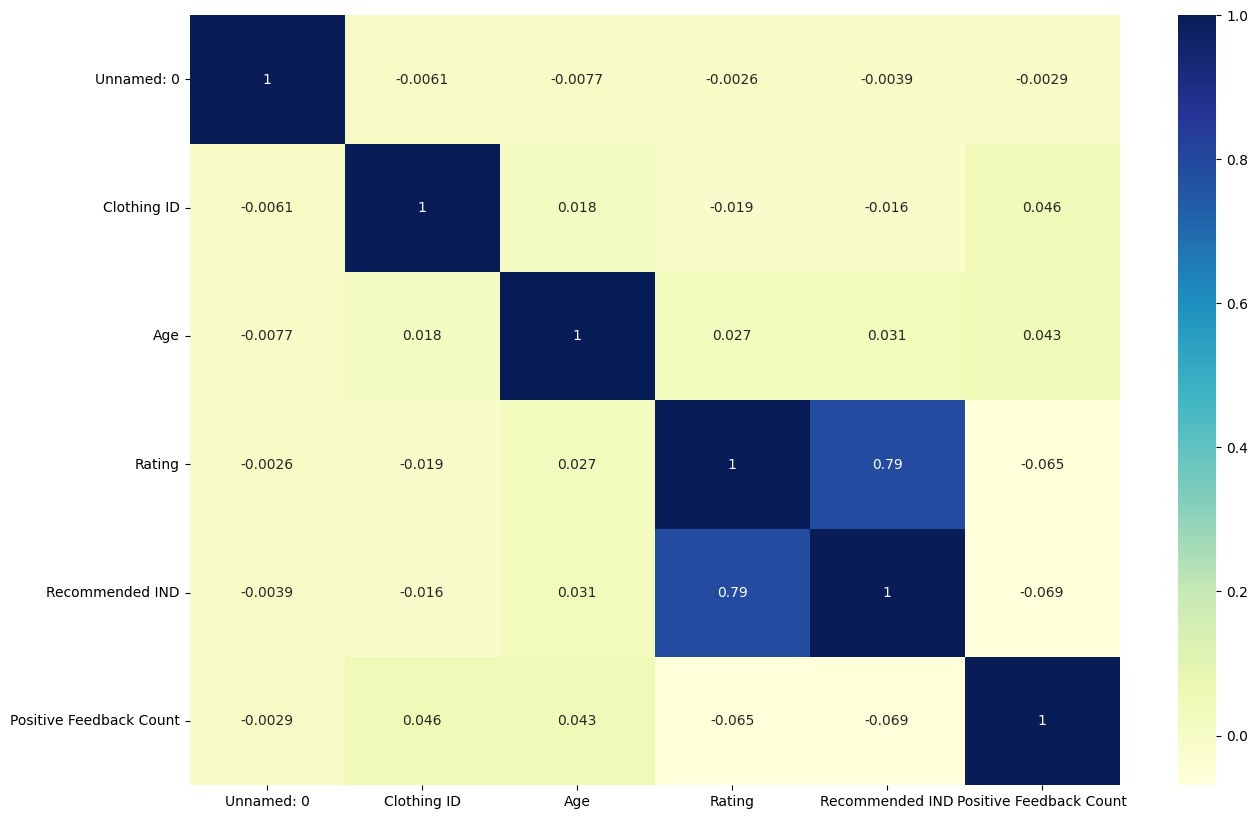

In [ ]:
# Mapa de calor.
fig = plt.subplots(figsize=(15,10))
conte = pd.concat([varNum],axis=1)
sns.heatmap(conte.corr(),cmap='YlGnBu',annot=True)
plt.show()

#Tratamiento de datos faltantes para regresión

In [ ]:
# Contéo de datos faltantes. Los números que aparecen en frente de 'False'
  # indican la cantidad de datos nulos que hay en cada columna.
varNum.notnull().apply(pd.Series.value_counts)

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
True,23486,23486,23486,23486,23486,23486


In [ ]:
from sklearn.impute import SimpleImputer as Imputer

In [ ]:
# Imputación de datos faltantes para REGRESIÓN.
imputar = Imputer(missing_values=np.nan, strategy='median')
value = imputar.fit_transform(varNum)
value

array([[0.0000e+00, 7.6700e+02, 3.3000e+01, 4.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0800e+03, 3.4000e+01, 5.0000e+00, 1.0000e+00,
        4.0000e+00],
       [2.0000e+00, 1.0770e+03, 6.0000e+01, 3.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.3483e+04, 1.1040e+03, 3.1000e+01, 3.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.3484e+04, 1.0840e+03, 2.8000e+01, 3.0000e+00, 1.0000e+00,
        2.0000e+00],
       [2.3485e+04, 1.1040e+03, 5.2000e+01, 5.0000e+00, 1.0000e+00,
        2.2000e+01]])

In [ ]:
# Se crea un DS temporal llamado 'varNum_temp' con los valores transformados.
varNum_temp = pd.DataFrame(value)
varNum_temp

,0,1,2,3,4,5
0,0.0,767.0,33.0,4.0,1.0,0.0
1,1.0,1080.0,34.0,5.0,1.0,4.0
2,2.0,1077.0,60.0,3.0,0.0,0.0
3,3.0,1049.0,50.0,5.0,1.0,0.0
4,4.0,847.0,47.0,5.0,1.0,6.0
...,...,...,...,...,...,...
23481,23481.0,1104.0,34.0,5.0,1.0,0.0
23482,23482.0,862.0,48.0,3.0,1.0,0.0
23483,23483.0,1104.0,31.0,3.0,0.0,1.0
23484,23484.0,1084.0,28.0,3.0,1.0,2.0


In [ ]:
# Se crea un nuevo DS llamado 'clrVarNum' con los valores transformados con el
  # fin de agregar los índices y los nombres de cada columna.
clrVarNum = pd.DataFrame(varNum_temp)
clrVarNum.columns = varNum.columns # Definimos las columnas del nuevo DS.
clrVarNum.index = varNum.index    # Definimos los índices del nuevo DS.
clrVarNum

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,0.0,767.0,33.0,4.0,1.0,0.0
1,1.0,1080.0,34.0,5.0,1.0,4.0
2,2.0,1077.0,60.0,3.0,0.0,0.0
3,3.0,1049.0,50.0,5.0,1.0,0.0
4,4.0,847.0,47.0,5.0,1.0,6.0
...,...,...,...,...,...,...
23481,23481.0,1104.0,34.0,5.0,1.0,0.0
23482,23482.0,862.0,48.0,3.0,1.0,0.0
23483,23483.0,1104.0,31.0,3.0,0.0,1.0
23484,23484.0,1084.0,28.0,3.0,1.0,2.0


In [ ]:
# Se comprueba la cantidad de valores faltantes.
conteo_valores_perdidos_por_columna = clrVarNum.isnull().sum()
print(f'Cantidad de valores faltantes: {conteo_valores_perdidos_por_columna.sum()}')

Cantidad de valores faltantes: 0


#Tratamiento de datos faltantes para clasificación

In [ ]:
# Imputación de datos faltantes
imputerCla = Imputer(missing_values=np.nan,strategy='most_frequent')
valuesCla = imputerCla.fit_transform(varNum)
valuesCla
# Se crea un DS temporal llamado 'varNum_temp' con los valores transformados.
varNum_temp_Cla = pd.DataFrame(valuesCla)
varNum_temp_Cla

,0,1,2,3,4,5
0,0,767,33,4,1,0
1,1,1080,34,5,1,4
2,2,1077,60,3,0,0
3,3,1049,50,5,1,0
4,4,847,47,5,1,6
...,...,...,...,...,...,...
23481,23481,1104,34,5,1,0
23482,23482,862,48,3,1,0
23483,23483,1104,31,3,0,1
23484,23484,1084,28,3,1,2


In [ ]:
# Se crea un nuevo DS llamado 'clrVarNum' con los valores transformados con el
  # fin de agregar los índices y los nombres de cada columna.

 # Definimos las columnas del nuevo DS.
     # Definimos los índices del nuevo DS.
clrVarNum_Cla = pd.DataFrame(varNum_temp_Cla)
clrVarNum_Cla.columns = varNum.columns # Definimos las columnas del nuevo DS.
clrVarNum_Cla.index = varNum.index    # Definimos los índices del nuevo DS.
clrVarNum_Cla

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,0,767,33,4,1,0
1,1,1080,34,5,1,4
2,2,1077,60,3,0,0
3,3,1049,50,5,1,0
4,4,847,47,5,1,6
...,...,...,...,...,...,...
23481,23481,1104,34,5,1,0
23482,23482,862,48,3,1,0
23483,23483,1104,31,3,0,1
23484,23484,1084,28,3,1,2


In [ ]:
# Se comprueba la cantidad de valores faltantes.
conteo_valores_perdidos_por_columna_cla = clrVarNum_Cla.isnull().sum()
print(f'Cantidad de valores faltantes: {conteo_valores_perdidos_por_columna_cla.sum()}')

Cantidad de valores faltantes: 0
